In [ ]:
'''Q.2 Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip    '''


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset
df = pd.read_csv("https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv.zip")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
df.shape # to check the dimension of the data set (rows, columns)

(18249, 14)

In [3]:
df.dtypes #Checking the types of columns

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
#checking the null Values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [14]:
#CLASSIFICATION TASK {Region Prediction}
# Encode categorical variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df

'''Encode Categorical Variables'''

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,1
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

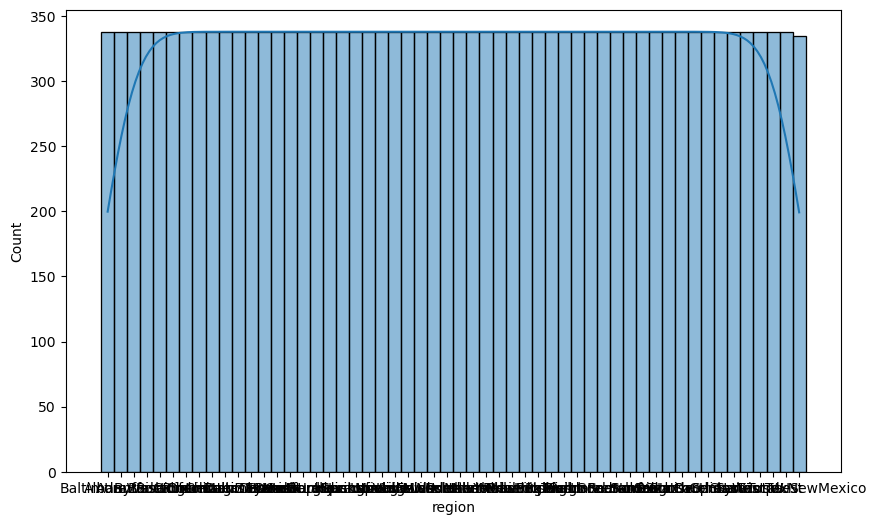

In [15]:
# Visualisation of distribution of the target variable (charges)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['region'], bins=30, kde=True)

print(df['region'].value_counts())
plt.show()

In [16]:
#seperating numerical columns 
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns', numerical_col)
    

Numerical Columns ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'type_organic']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

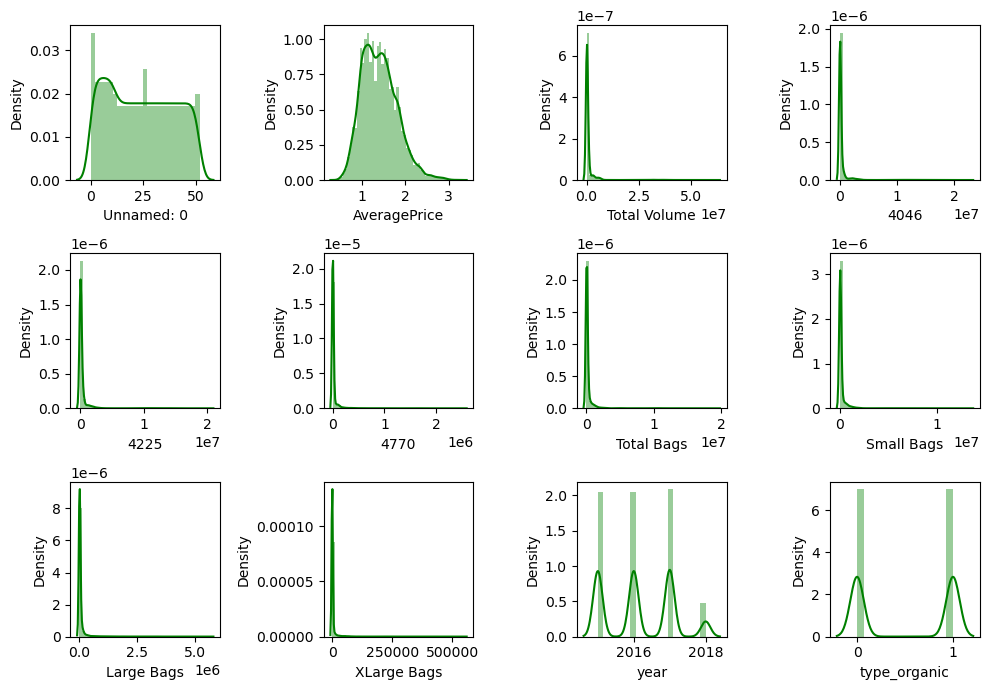

In [20]:
#lets check how the data has been distributed in remaining column 
plt.figure(figsize = (10, 7), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=13:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col], color='g')        
        plt.yticks(rotation=0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

In [21]:
# Checking for skewness
df.skew()

#Acceptable range of skewness is from -0.5 to +0.5

C:\Users\riki\AppData\Local\Temp\ipykernel_9324\1828908631.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
type_organic     0.000329
dtype: float64

In [22]:
#Removing Skewness using cuberoot method
df['Total Volume'] = np.cbrt(df['Total Volume'])
df['4046'] = np.cbrt(df['4046'])
df['4225'] = np.cbrt(df['4225'])
df['4770'] = np.cbrt(df['4770'])
df['Total Bags'] = np.cbrt(df['Total Bags'])
df['Small Bags'] = np.cbrt(df['Small Bags'])
df['Large Bags'] = np.cbrt(df['Large Bags'])
df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])

In [23]:
# Checking Again for skewness
df.skew()

C:\Users\riki\AppData\Local\Temp\ipykernel_9324\4271163632.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
year            0.215339
type_organic    0.000329
dtype: float64

In [27]:
#Checking the correlation between feature and the target. NOTE: Range is from (-1 to +1) & 0 represent no correlation
cor=df.corr()
cor


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
Unnamed: 0,1.000000,-0.133008,0.015311,0.020159,0.030507,0.054152,-0.019253,-0.022263,-0.018936,-0.031480,-0.171667,-0.000288
AveragePrice,-0.133008,1.000000,-0.488566,-0.499613,-0.416745,-0.433402,-0.468342,-0.437754,-0.430645,-0.302900,0.093197,0.615845
Total Volume,0.015311,-0.488566,1.000000,0.936579,0.959318,0.855680,0.968592,0.960888,0.813446,0.736414,0.049149,-0.648185
4046,0.020159,-0.499613,0.936579,1.000000,0.826342,0.790790,0.889873,0.880089,0.769275,0.693262,0.012694,-0.601513
4225,0.030507,-0.416745,0.959318,0.826342,1.000000,0.845655,0.905044,0.904775,0.735340,0.691925,-0.004311,-0.633736
4770,0.054152,-0.433402,0.855680,0.790790,0.845655,1.000000,0.803904,0.809414,0.639581,0.729334,-0.062421,-0.594900
Total Bags,-0.019253,-0.468342,0.968592,0.889873,0.905044,0.803904,1.000000,0.982716,0.858497,0.743290,0.158680,-0.599888
Small Bags,-0.022263,-0.437754,0.960888,0.880089,0.904775,0.809414,0.982716,1.000000,0.764841,0.742418,0.143385,-0.605591
Large Bags,-0.018936,-0.430645,0.813446,0.769275,0.735340,0.639581,0.858497,0.764841,1.000000,0.592155,0.166212,-0.461433
XLarge Bags,-0.031480,-0.302900,0.736414,0.693262,0.691925,0.729334,0.743290,0.742418,0.592155,1.000000,0.151598,-0.490964


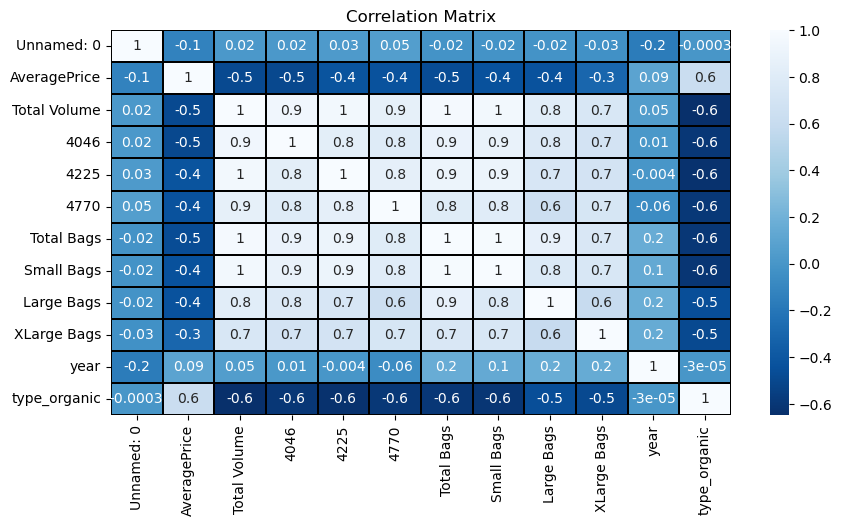

In [28]:
#Visualising the correlation matrix by plotting heat map
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linecolor='black', fmt=".1g", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

# NOTE: 0- no relation, -0.3 to +0.3 - less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or greater than +0.7 high correlation

In [31]:
# Define features and target for classification [Choosing appropriate features and the target variable for classification]
x_classification = df[['AveragePrice', 'Total Volume', '4046', '4225', '4770']]
y_classification = df['region']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_classification, y_classification, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier()
clf.fit(x_train_class, y_train_class)

# Predictions
y_pred_class = clf.predict(x_test_class)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy:.2f}')
print(classification_report(y_test_class, y_pred_class))


Classification Accuracy: 0.81
                     precision    recall  f1-score   support

             Albany       0.83      0.76      0.79        63
            Atlanta       0.70      0.73      0.71        73
BaltimoreWashington       0.92      0.97      0.94        61
              Boise       0.84      0.85      0.84        72
             Boston       0.86      0.85      0.86        67
   BuffaloRochester       0.67      0.73      0.70        73
         California       0.87      0.89      0.88        62
          Charlotte       0.95      0.78      0.86        76
            Chicago       0.96      0.94      0.95        72
   CincinnatiDayton       0.85      0.88      0.86        65
           Columbus       0.77      0.74      0.76        65
      DallasFtWorth       0.80      0.88      0.84        68
             Denver       0.84      0.82      0.83        65
            Detroit       0.75      0.77      0.76        66
        GrandRapids       0.72      0.72      0.72    

In [33]:
#REGRESSION TASK {Average Price Prediction}
# Define features and target for regression [Choosing appropriate features and the target variable for regression]
x_regression = df[['Total Volume', '4046', '4225', '4770', 'type_organic']]
y_regression = df['AveragePrice']


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_regression, y_regression, test_size=0.2, random_state=42)

# Initialize and train the regressor
reg = LinearRegression()
reg.fit(x_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(x_test_reg)

# Evaluate the model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Regression Mean Absolute Error: {mae:.2f}')
print(f'Regression Mean Squared Error: {mse:.2f}')
print(f'Regression R-squared: {r2:.2f}')


Regression Mean Absolute Error: 0.24
Regression Mean Squared Error: 0.09
Regression R-squared: 0.42
